# Sueldo de los directores generales (CEO) y rendimiento sobre el capital

<p align='justify'>En la población de los directores generales, sea y el sueldo anual (salary) en miles de dólares. De manera que y=856.3 corresponde a un sueldo anual de \$856,300 y y=1,452.6 corresponde a un sueldo de $1,452,600. Sea x el promedio, en los últimos tres años, del rendimiento sobre el capital (roe) en las empresas de los CEO. (El rendimiento sobre el capital se define en términos de utilidad neta como porcentaje de acciones comunes.) Por ejemplo, si roe=10, el rendimiento promedio sobre el capital es 10 por ciento. 
</p>

<p align='justify'> Para estudiar la relación entre esta medida del desempeño de una empresa y el pago que reciben los CEO, se postula el modelo:</p>

$$ salary =  \beta_0 + \beta_1 (roe) +  u $$

In [1]:
# Se importan las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# Se cargan los datos
data = pd.read_excel(
    'C:/Users/crisd/OneDrive/Escritorio/libros/Datasets/ceosal1.xlsx', usecols=['SALARY', 'ROE'])
data.head()


,ROE,SALARY
0,14.1,1095
1,10.9,1001
2,23.5,1122
3,5.9,578
4,13.8,1368


In [3]:
# Se reviza el dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ROE     209 non-null    float64
 1   SALARY  209 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


<p align='justify'>La base de datos CEOSAL1.RAW contiene información, correspondiente al año 1990, sobre 209 CEO; estos datos fueron obtenidos de Business Week (5/6/91). En esta muestra, el sueldo anual promedio es \$1’281,120, y los sueldos menor y mayor son \$223,000 y \$14,822,000, respectivamente. La media del rendimiento sobre capital en 1988, 1989 y 1990 es 17.18% y los valores menor y mayor son 0.5 y 56.3%, respectivamente.</p>

In [4]:
# Se imprimen las estadísticas descriptivas del conjunto de datos.
data.describe()


,ROE,SALARY
count,209.000000,209.000000
mean,17.184211,1281.119617
std,8.518509,1372.345308
min,0.500000,223.000000
25%,12.400000,736.000000
50%,15.500000,1039.000000
75%,20.000000,1407.000000
max,56.300000,14822.000000


<p align='justify'>El parámetro de la pendiente 1 mide la variación del sueldo anual, en miles de dólares, que corresponde a un incremento de un punto porcentual en el rendimiento sobre capital. Debido a que un roe más alto es bueno para la empresa se considera que 1 > 0.</p>

In [5]:
# Se separan las variables independiente y dependiente.
X = data['ROE'].copy()
y = data['SALARY'].copy()

# Para el caso de la api de statsmodels se requiere colocar el intercepto manualmente.
X_sm = sm.add_constant(X)

# Se crea el modelo de regresion lineal.
model = sm.OLS(y, X_sm).fit()

# Se imprime el resumen del modelo.
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Mon, 02 May 2022   Prob (F-statistic):             0.0978
Time:                        21:08:55   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    213.240      4.517      0.000     542.790    1383.592
ROE           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.901
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Para el caso de la api de sklearn se requiere cambiar el formato de las variables.
model_sk = LinearRegression().fit(X.values.reshape(-1, 1), y.values)

# Se imprime el resumen del modelo.
# Sklearn no posee resumen del modelo.
# Se imprime el intercepto y la coeficiente de la regresion lineal.
print('Intercepto:', model_sk.intercept_)
print('Coeficiente B1:', model_sk.coef_[0])


Intercepto: 963.1913274732431
Coeficiente B1: 18.501186846190226


<p align='justify'>Usando los datos de CEOSAL1, la línea de regresión de MCO que relaciona salary y roe es:</p>

$$ \widehat{salary} = 963.191 + 18.501 \left( roe\right) $$

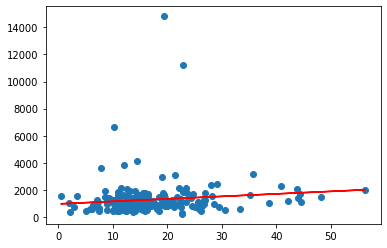

In [7]:
# Se grafica el modelo.
plt.scatter(X, y)
plt.plot(X, model.predict(X_sm), color='red')
plt.show()


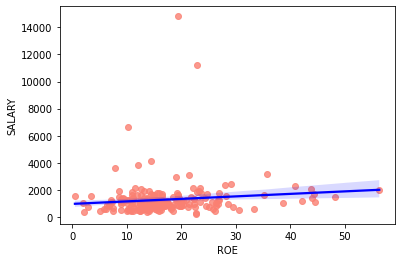

In [8]:
# Otra forma de graficar el modelo.
sns.regplot(x=X, y=y, color='salmon', marker='o', line_kws={'color': 'b'})
plt.show()


Calculamos los errores.

In [9]:
y_hat = model.predict(X_sm)
errors = pd.DataFrame({'x': X, 'y': y, 'y_hat': y_hat, 'u': y - y_hat})
errors.head(15)

,x,y,y_hat,u
0,14.1,1095,1224.058062,-129.058062
1,10.9,1001,1164.854264,-163.854264
2,23.5,1122,1397.969218,-275.969218
3,5.9,578,1072.348330,-494.348330
4,13.8,1368,1218.507706,149.492294
5,20.0,1145,1333.215064,-188.215064
6,16.4,1078,1266.610792,-188.610792
7,16.3,1094,1264.760673,-170.760673
8,10.5,1237,1157.453789,79.546211
9,26.3,833,1449.772542,-616.772542


Los primeros cuatro CEO tienen un sueldo menor que el que se predice empleando la línea de regresión
de MCO; en otras palabras, dado únicamente el roe de las empresas, estos CEO ganan menos de lo
que se predice. Como se puede ver, por el ugorro positivo, el quinto CEO gana más de lo que se predice
de acuerdo con la línea de regresión de MCO.

(1) La suma, y por tanto el promedio muestral de los residuales de MCO, es cero.

In [10]:
errors['u'].mean().round()

0.0

(2) La covarianza muestral entre los regresores y los residuales de MCO es cero.

In [11]:
errors[['x', 'u']].cov().round()

,x,u
x,73.0,-0.0
u,-0.0,1858493.0


Se definen la suma total de cuadrados (STC), la suma explicada de cuadrados (SEC) y
la suma residual de cuadrados (SRC) (conocida también como suma de residuales cuadrados),
como sigue:

$$ STC \equiv \sum_{i=1}^{n}{\left(y_i - \bar{y}\right)^2}$$

$$ SEC \equiv \sum_{i=1}^{n}{\left(\hat{y_i} - \bar{y}\right)^2}$$

$$ SRC \equiv \sum_{i=1}^{n}{\hat{u}_i ^2}$$

$$ STC = SEC + SRC$$

In [12]:
STC = ((y-y.mean())**2).sum()
SEC = ((y_hat-y.mean())**2).sum()
SRC = (errors['u']**2).sum()

if STC == (SEC + SRC):
    print('El modelo cumplio la condición de estadistica')
else:
    print('El modelo no cumplio la condición de estadistica')

El modelo cumplio la condición de estadistica


R2 es el cociente de la variación explicada entre la variación total; por tanto, se interpreta como la proporción de la variación muestral de y que es explicada por x. La segunda igualdad en la ecuación proporciona otra manera de calcular R2.

$$ R^2 \equiv SEC/STC = 1 - SRC/STC $$

Al interpretar R2 , se acostumbra multiplicarla por 100 para transformarla en un porcentaje: 100 * R2 es el porcentaje de la variación muestral de y que es explicada por x.

In [13]:
# Se calcula el coeficiente de determinación r2.
(SEC/STC).round(4)


0.0132

In [14]:
# Una forma alternativa de calcular el coeficiente de determinación r2 con la api de sklearn.
r2_score(y, y_hat).round(4)

0.0132

El rendimiento sobre el capital de las empresas sólo explica, aproximadamente, 1.3 por ciento de la variación en los salarios de esta muestra de 209 CEO. Esto significa que ¡98.7 por ciento de la variación en los salarios de estos CEO no queda explicada! Esta falta de poder explicativo no debe sorprender, pues hay otras múltiples características, tanto de la empresa como de cada CEO, que influyen en el sueldo; estos factores quedan necesariamente incluidos en los errores en un análisis de regresión simple.

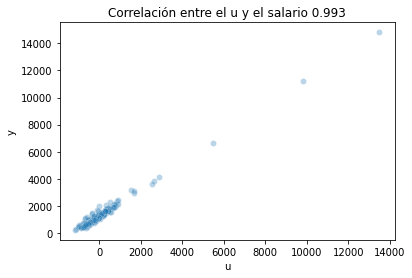

In [15]:
corre = np.corrcoef(errors['u'], errors['y'])[0][1]

sns.scatterplot(y=errors['y'], x=errors['u'], alpha=0.3)
plt.title('Correlación entre el u y el salario %.3f' % corre)
plt.show()


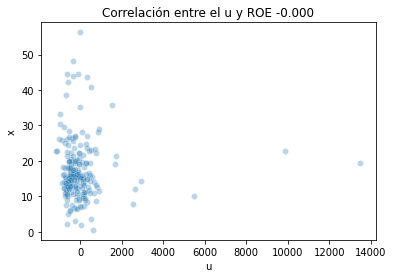

In [16]:
corre = np.corrcoef(errors['u'], errors['x'])[0][1]

sns.scatterplot(y=errors['x'], x=errors['u'], alpha=0.3)
plt.title('Correlación entre el u y ROE %.3f' % corre)
plt.show()